## Setting up an Orbit

To set up a Keplerian orbital system in `jaxoplanet` we can define initialize a `Central` object (e.g. a star) and an orbiting `Body` object (e.g. a planet).

In [7]:
from jaxoplanet.orbits.keplerian import Central, Body
from jaxoplanet.units import unit_registry as ureg
from jaxoplanet import units
import jax.numpy as jnp

We can initialize the `Central` object using two of radius, mass and/or density, otherwise `jaxoplanet` will populate these parameters with the default values and units of a Solar analogue star:

In [2]:
Central()

Central(
  mass=<Quantity(1.0, 'M_sun')>,
  radius=<Quantity(1.0, 'R_sun')>,
  density=<Quantity(0.238732415, 'M_sun / R_sun ** 3')>
)

We can instead choose to create a `Central` object using orbital parameters, for example for the Sun-Earth system:

In [3]:
Sun = Central.from_orbital_properties(period=1.0 * ureg.yr, semimajor=1.0 * ureg.au, radius=1.0 * ureg.R_sun, body_mass=1.0 * ureg.M_earth)
Sun

Central(
  mass=<Quantity(0.0253282492, 'M_sun')>,
  radius=<Quantity(1.0, 'R_sun')>,
  density=<Quantity(0.0060466741, 'M_sun / R_sun ** 3')>
)

In [13]:
Sun.mass * 4 * jnp.pi**2

0.9999192008422831 <Unit('M_sun')>

To create a Keplerian `Body` we must define either the orbital period or semi-major axis. There are also a number of optional orbital parameters we can set at this point:

In [51]:
Earth = Body(central=Central(), semimajor=1*ureg.au)
Earth

Body(
  central=Central(
    mass=<Quantity(1.0, 'M_sun')>,
    radius=<Quantity(1.0, 'R_sun')>,
    density=<Quantity(0.238732415, 'M_sun / R_sun ** 3')>
  ),
  time_ref=<Quantity(-91.3142318725586, 'day')>,
  time_transit=<Quantity(0.0, 'day')>,
  period=<Quantity(365.2569274902344, 'day')>,
  semimajor=<Quantity(215.032156, 'R_sun')>,
  sin_inclination=<Quantity(1.0, 'dimensionless')>,
  cos_inclination=<Quantity(0.0, 'dimensionless')>,
  impact_param=<Quantity(0.0, 'dimensionless')>,
  mass=None,
  radius=None,
  eccentricity=None,
  sin_omega_peri=None,
  cos_omega_peri=None,
  sin_asc_node=None,
  cos_asc_node=None,
  radial_velocity_semiamplitude=None,
  parallax=None
)

ADD SOMETHING ABOUT ECCENTRICITY = 0

In [52]:
Earth.period

Array(365.25693, dtype=float32, weak_type=True) <Unit('day')>

Users familiar with `KeplarianOrbit`s within `exoplanet` (see [tutorial](https://docs.exoplanet.codes/en/latest/tutorials/data-and-models/)) can access the relative positions and velocities of the bodies in a similar way:

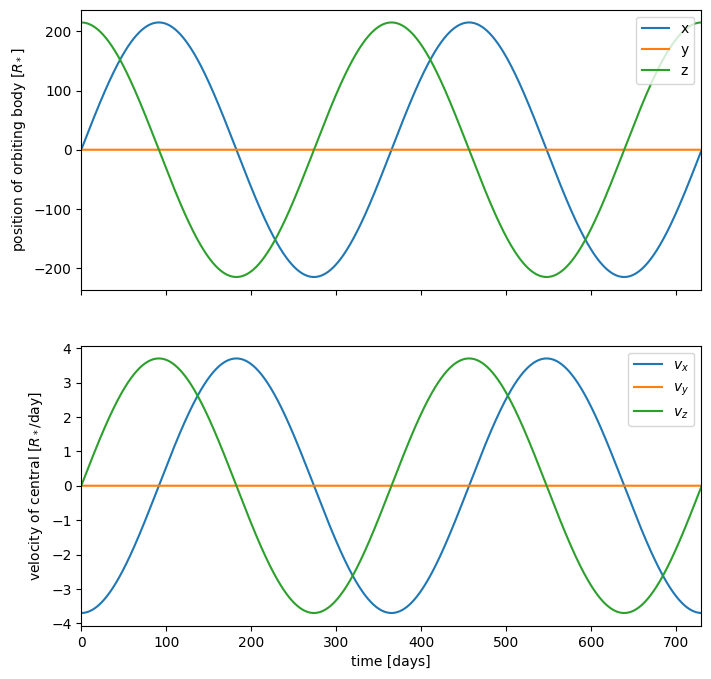

In [45]:
from matplotlib import pyplot as plt

# Get the position of the planet and velocity of the star as a function of time
t = jnp.linspace(0, 730, 5000)
x, y, z = Earth.relative_position(t)
vx, vy, vz = Earth.central_velocity(t)

# Plot the coordinates
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
ax = axes[0]
ax.plot(t, x, label="x")
ax.plot(t, y, label="y")
ax.plot(t, z, label="z")
ax.set_ylabel("position of orbiting body [$R_*$]")
ax.legend(fontsize=10, loc=1)

ax = axes[1]
ax.plot(t, vx, label="$v_x$")
ax.plot(t, vy, label="$v_y$")
ax.plot(t, vz, label="$v_z$")
ax.set_xlim(t.min(), t.max())
ax.set_xlabel("time [days]")
ax.set_ylabel("velocity of central [$R_*$/day]")
_ = ax.legend(fontsize=10, loc=1)